In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

<h1>UK ACCIDENTS DATA ANALYSIS</h1>
<h2>Inclusive year 2019-2022</h2>
<h4>Analyst: Alexis Jaenna Argosino</h3>

In [2]:
accidents = pd.read_csv('datasets//accident_data.csv')

In [3]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna('unknown road')
accidents['Road_Type'] = accidents['Road_Type'].fillna('unaccounted')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('unaccounted')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])

In [6]:
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [7]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [8]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Longitude'] = accidents['Longitude'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

In [9]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  object  
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  object  
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  category
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

In [10]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = "coerce")

In [11]:
accidents['Year'] = accidents["Accident Date"].dt.year
accidents['Month'] = accidents["Accident Date"].dt.month
accidents['Day'] = accidents["Accident Date"].dt.day
accidents['DayofWeek'] = accidents["Accident Date"].dt.dayofweek

In [12]:
accidents


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h1>INSIGHTS NO. 1</h1>
<h3>The highest record of casualties totals 398,684 which occured during daylight with fine no high winds weather.</h3>

In [13]:
accident_conditions = accidents.groupby(['Weather_Conditions', 'Light_Conditions'])['Number_of_Casualties'].count().unstack()

In [14]:
accident_conditions

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Weather_Conditions,,,,,
Fine + high winds,59,1852,51,796,5796
Fine no high winds,3683,91951,1700,24867,398684
Fog or mist,65,921,37,862,1643
Other,186,4803,143,1915,10103
Raining + high winds,111,3066,73,1423,4942
Raining no high winds,621,22666,459,6208,49742
Snowing + high winds,15,241,5,171,453
Snowing no high winds,94,1828,30,811,3475
unaccounted,1650,2007,45,384,10042


<Axes: xlabel='Weather_Conditions'>

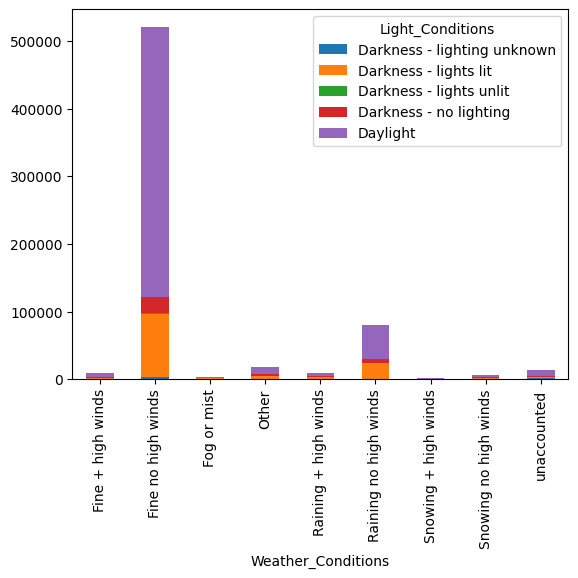

In [70]:
accident_conditions.plot(kind='bar', stacked=True)

<h1>INSIGHTS NO. 2</h1>
<h3>The highest recorded number of casualties totals 316,062 involving car-type vehicles in an urban area. Additionally, car-related casualties in rural areas are also high, totaling 181,922.</h3>

In [16]:
accident_vehicle = accidents.groupby(['Vehicle_Type', 'Urban_or_Rural_Area'])['Number_of_Casualties'].size().unstack()

In [17]:
accident_vehicle

Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,675,0,1272
Bus or coach (17 or more pass seats),9025,2,16851
Car,181922,8,316062
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,6156,0,11151
Goods over 3.5t. and under 7.5t,2232,0,3864
Minibus (8 - 16 passenger seats),718,0,1258
Motorcycle 125cc and under,5023,0,10246
Motorcycle 50cc and under,2710,0,4893


<Axes: xlabel='Vehicle_Type'>

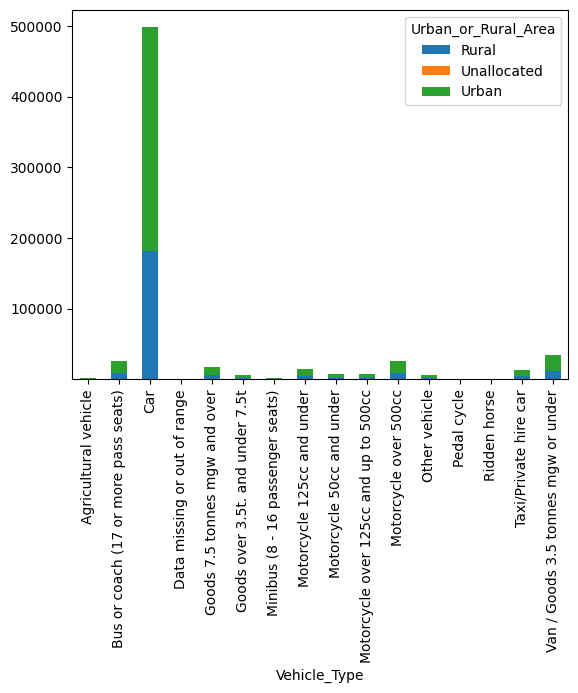

In [72]:
accident_vehicle.plot(kind='bar', stacked=True)

<h1>INSIGHTS NO. 3</h1>
<h3>The accident severity is highest for fatal incidents on dry road surfaces compared to other conditions. In addition, slight accident severity accounts for the highest number of casualties on dry roads, totaling 380,395 incidents.</h3>

In [18]:
accident_severity = accidents.groupby(['Accident_Severity','Road_Surface_Conditions'])['Number_of_Casualties'].size().unstack()

In [19]:
accident_severity

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,unknown road
Accident_Severity,,,,,,
Fatal,5788,23,193,35,2620,2
Serious,61638,152,2007,565,23785,70
Slight,380395,842,16317,5290,160303,654


<Axes: xlabel='Accident_Severity'>

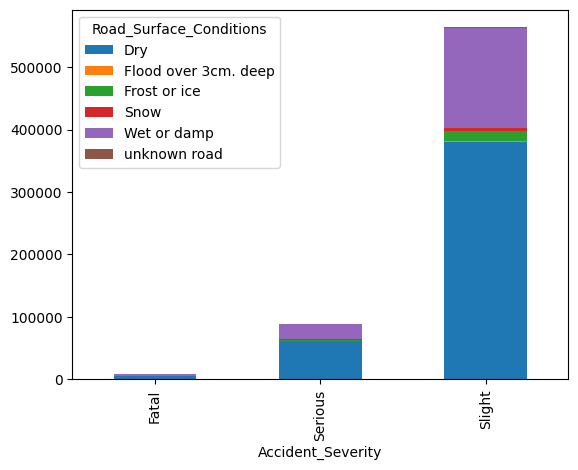

In [74]:
accident_severity.plot(kind='bar', stacked= True)

<h1>INSIGHTS NO. 4</h1>
<h3>Birmingham has the highest number of accident based on district area</h3>

In [20]:
accident_district = accidents['District Area'].value_counts()

In [61]:
accident_district

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [65]:
district = accident_district.head(5)
district

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

<Axes: xlabel='District Area'>

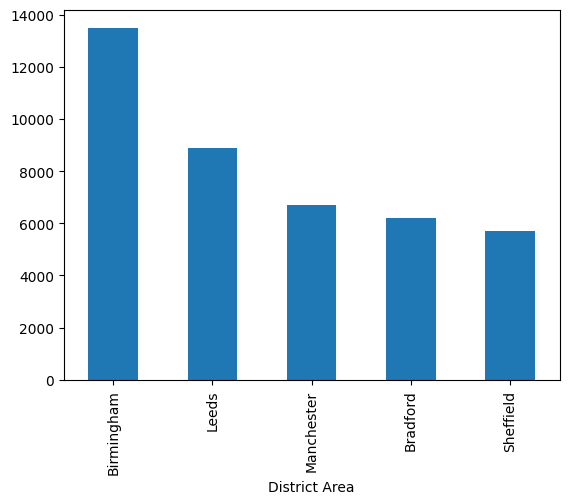

In [66]:
district.plot(kind='bar')

<h1>INSIGHTS NO. 5</h1>
<h3>Out of the total number of accidents, the most common weather condition at the time was fine with no high winds, accounting for 520,885 incidents.</h3>

In [22]:
accident_weather = accidents['Weather_Conditions'].value_counts()

In [23]:
accident_weather

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<Axes: xlabel='Weather_Conditions'>

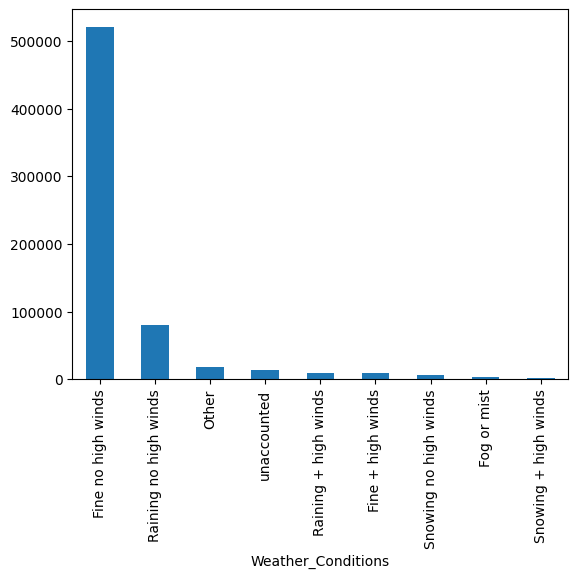

In [75]:
accident_weather.plot(kind='bar')

<h1>INSIGHTS NO. 6</h1>
<h3>The results prove that single carriageway roads are more susceptible to accidents, with a total of 415,557 accidents, including 6,527 fatal accidents—the highest among all road types.</h3>

In [24]:
accident_roadsevere = accidents.groupby(['Accident_Severity', 'Road_Type']).size().unstack()

In [25]:
accident_roadsevere

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Accident_Severity,,,,,,
Fatal,1815,95,142,6527,49,33
Serious,11746,1655,3665,70059,611,481
Slight,85863,11809,40185,415557,6381,4006


<Axes: xlabel='Accident_Severity'>

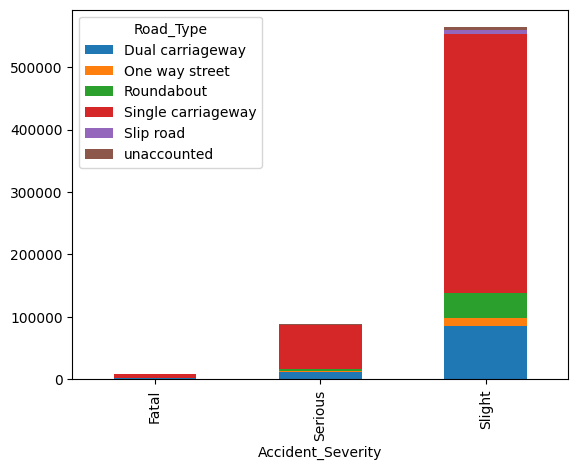

In [78]:
accident_roadsevere.plot(kind='bar', stacked=True)

<h1>INSIGHTS NO. 7</h1>
<h3>Despite single carriageways having the highest number of accidents, dual carriageways tend to involve more vehicles per accident compared to other road types, with an average of 2.01 vehicles per accident.</h3>

In [26]:
accident_vehicleroad_avg = np.round(accidents.groupby('Road_Type')['Number_of_Vehicles'].mean(), 2)

In [27]:
accident_vehicleroad_avg

Road_Type
Dual carriageway      2.01
One way street        1.59
Roundabout            1.90
Single carriageway    1.80
Slip road             1.92
unaccounted           1.67
Name: Number_of_Vehicles, dtype: float64

<Axes: xlabel='Road_Type'>

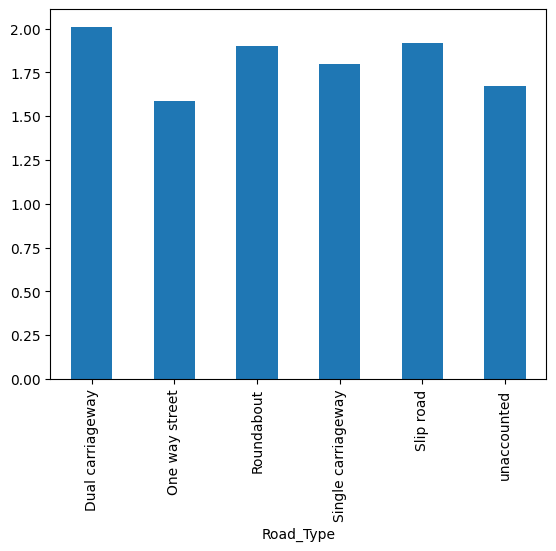

In [80]:
accident_vehicleroad_avg.plot(kind='bar')

<h1>INSIGHTS NO. 8</h1>
<h3>Accidents in rural areas tend to be more severe, resulting in higher casualties and involving more vehicles per accident compared to urban areas.</h3>

In [28]:
accident_areacasualties_avg = np.round(accidents.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean(),2)

In [29]:
accident_areacasualties_avg

Urban_or_Rural_Area
Rural          1.48
Unallocated    1.18
Urban          1.29
Name: Number_of_Casualties, dtype: float64

In [30]:
accident_areavehicles_avg = np.round(accidents.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean(),2)

In [31]:
accident_areavehicles_avg

Urban_or_Rural_Area
Rural          1.87
Unallocated    1.91
Urban          1.81
Name: Number_of_Vehicles, dtype: float64

<Axes: xlabel='Urban_or_Rural_Area'>

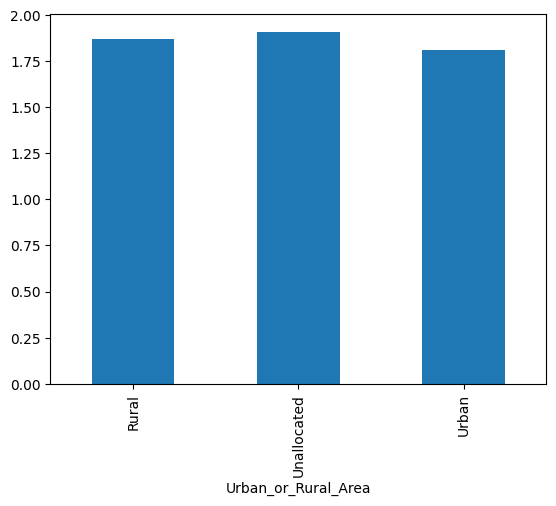

In [81]:
accident_areavehicles_avg.plot(kind='bar')

<h1>INSIGHT NO. 9</h1>
<h2>The number of casualties with a fine and no high winds weather and daylight is 109,091 in year 2019</h2>

In [32]:
accident_2019 = accidents[accidents['Year'] == 2019]
lightcon_2019 = accident_2019['Light_Conditions'].value_counts()

<Axes: xlabel='Light_Conditions'>

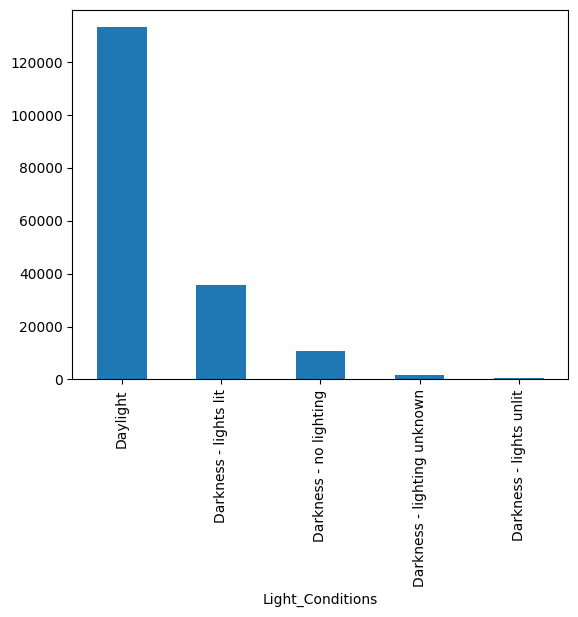

In [82]:
lightcon_2019.plot(kind='bar')

<h1>INSIGHT NO. 10</h1>
<h2>The top five districts with the highest number of fatal accidents are Birmingham, Leeds, Highland, East Riding of Yorkshire, and Bradford.</h2>

In [33]:
district_severity = accidents.groupby(["Accident_Severity", "District Area"]).size().unstack()


In [34]:
district_severity

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
Fatal,12,66,8,24,6,19,32,27,15,11,...,13,20,3,4,14,30,20,15,22,21
Serious,239,463,101,143,33,173,163,184,253,201,...,167,282,74,140,148,193,216,186,132,255
Slight,1072,1401,510,961,193,1155,601,625,1108,1183,...,1130,2164,781,864,1140,1138,1493,1037,815,1621


In [35]:
fatal_accidents = accidents[accidents["Accident_Severity"] == "Fatal"]
fatal_counts = fatal_accidents["District Area"].value_counts()  

fatal_districts = fatal_counts.head(5)


fatal_districts

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
Name: count, dtype: int64

<Axes: xlabel='District Area'>

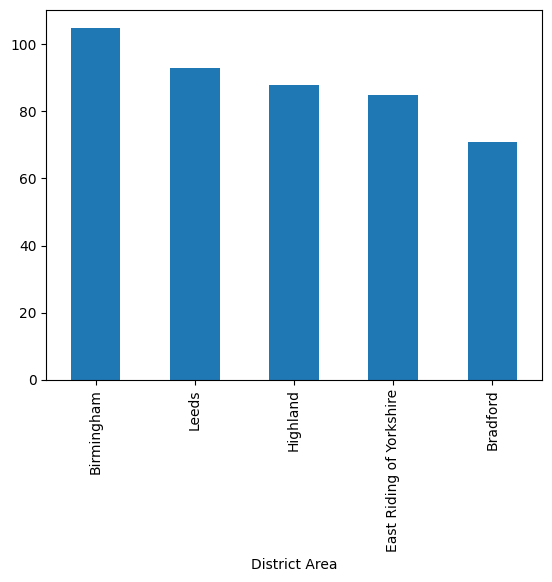

In [36]:
fatal_districts.plot(kind='bar')

<h1>INSIGHT NO. 11</h1>
<h2>The most common vehicle type involved in accidents, regardless of severity, is a car.</h2>

In [37]:
vehicle_severity = accidents.groupby(["Vehicle_Type", "Accident_Severity"]).size().unstack()
vehicle_severity

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,21,282,1644
Bus or coach (17 or more pass seats),325,3373,22180
Car,6577,66461,424954
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,216,2321,14770
Goods over 3.5t. and under 7.5t,67,857,5172
Minibus (8 - 16 passenger seats),29,276,1671
Motorcycle 125cc and under,189,2031,13049
Motorcycle 50cc and under,95,1014,6494


<Axes: xlabel='Vehicle_Type'>

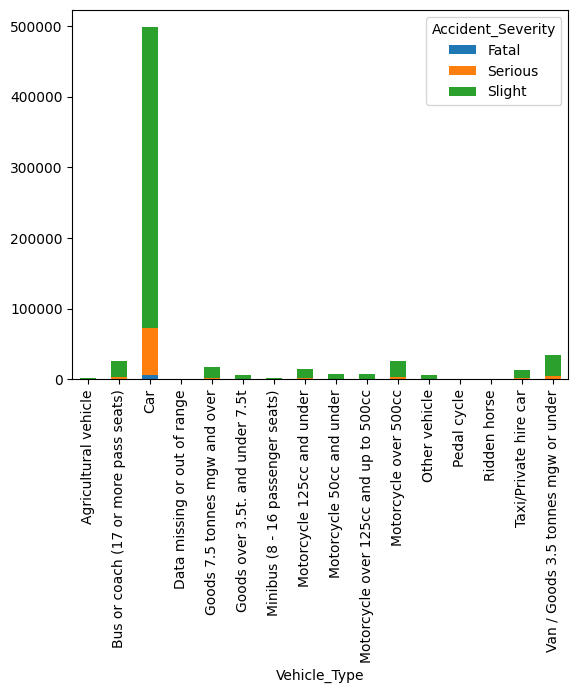

In [69]:
vehicle_severity.plot(kind='bar', stacked=True)

<h1>INSIGHT NO. 12</h1>
<h2>The month of November has the highest number of both casualties and severe accidents.</h2>

In [38]:
severe_months = accidents.groupby("Month")["Number_of_Casualties"].sum()
severe_months

Month
1     71038
2     66513
3     73076
4     70620
5     76796
6     76296
7     78490
8     75280
9     76053
10    80302
11    81453
12    70651
Name: Number_of_Casualties, dtype: int64

In [39]:
severe_months_total = accidents.groupby("Month")["Accident_Severity"].value_counts().unstack().sum(axis=1)
severe_months_total


Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
dtype: int64

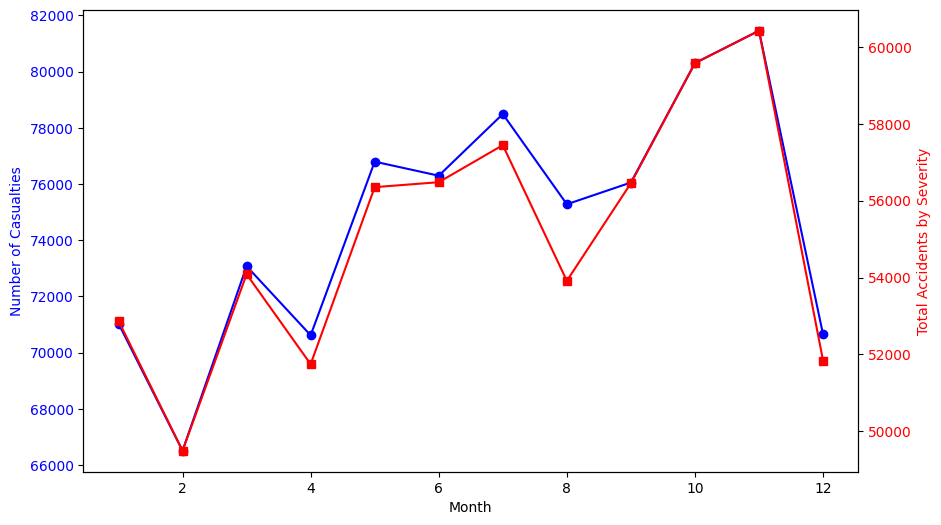

In [40]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(severe_months.index, severe_months.values, color='b', marker='o', label='Number of Casualties')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Casualties', color='b')
ax1.tick_params(axis='y', labelcolor='b')


ax2 = ax1.twinx()
ax2.plot(severe_months_total.index, severe_months_total.values, color='r', marker='s', label='Total Accidents by Severity')
ax2.set_ylabel('Total Accidents by Severity', color='r')
ax2.tick_params(axis='y', labelcolor='r')



<h1>INSIGHT NO. 13</h1>
<h2>There is a weak positive correlation between the number of vehicles involved in an accident and the number of casualties.</h2>

In [41]:
corr_vehicasualties = accidents['Number_of_Vehicles'].corr(accidents['Number_of_Casualties'])
corr_vehicasualties

np.float64(0.22888886126927557)

<Axes: xlabel='Number_of_Vehicles', ylabel='Number_of_Casualties'>

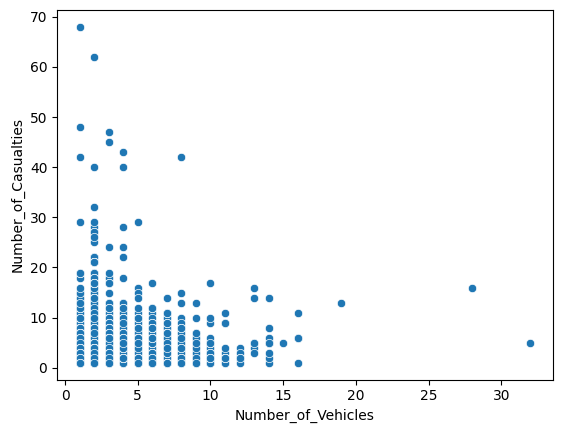

In [42]:
sns.scatterplot(x=accidents['Number_of_Vehicles'], y= accidents['Number_of_Casualties'])

<h1>INSIGHT NO. 14</h1>
<h2>Although rural areas have fewer accidents overall, they tend to have a higher proportion of fatal accidents.</h2>

In [43]:
area_severe = accidents.groupby(["Urban_or_Rural_Area", "Accident_Severity"]).size().unstack()
area_severe

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,5601,37312,196077
Unallocated,0,1,10
Urban,3060,50904,367714


In [44]:
area_severe_total = accidents.groupby(["Urban_or_Rural_Area", "Accident_Severity"]).size().unstack().sum(axis=1)
area_severe_total

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
dtype: int64

Text(0, 0.5, 'Severity')

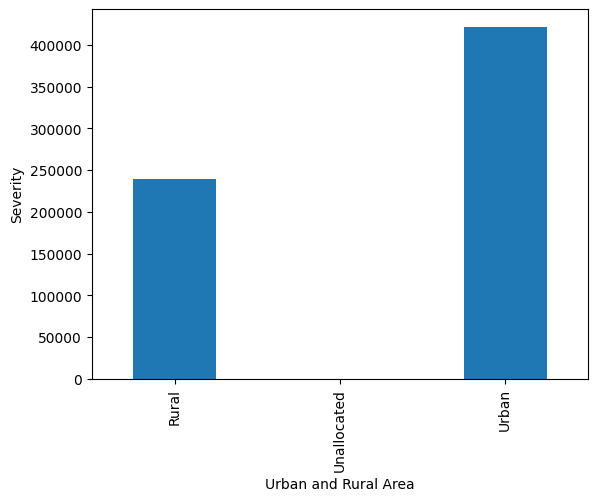

In [45]:
area_severe_total.plot(kind='bar')
plt.xlabel('Urban and Rural Area')
plt.ylabel('Severity')

<h1>INSIGHT NO. 15</h1>
<h2>There is a statistically significant difference in the number of vehicles involved across accident severity levels, but the difference is small.</h2>

P-value: 0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x25ddd73e490>,
 'caps': [<matplotlib.lines.Line2D at 0x25ddd73e710>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ddd73e350>,
 'medians': [<matplotlib.lines.Line2D at 0x25ddd73e990>,
 'fliers': [<matplotlib.lines.Line2D at 0x25ddd73ead0>,
 'means': []}

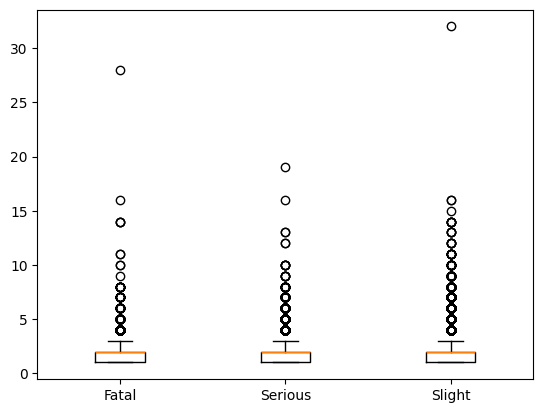

In [67]:
fatal = accidents[accidents['Accident_Severity'] == 'Fatal']['Number_of_Vehicles']
serious = accidents[accidents['Accident_Severity'] == 'Serious']['Number_of_Vehicles']
slight = accidents[accidents['Accident_Severity'] == 'Slight']['Number_of_Vehicles']


f_stat, p_value = f_oneway(fatal, serious, slight)
print("P-value:", p_value)

plt.boxplot([fatal, serious, slight], labels=['Fatal', 'Serious', 'Slight'])

In [47]:
print(fatal.mean(), serious.mean(), slight.mean())

1.7869760997575337 1.6783273065282203 1.8558640371336694


<h1>INSIGHT NO. 16</h1>
<h2>There is a statistically significant difference in the number of casualties between dry and wet road conditions.</h2>

P-value: 1.5774597323918563e-247


{'whiskers': [<matplotlib.lines.Line2D at 0x25ddd458910>,
 'caps': [<matplotlib.lines.Line2D at 0x25ddd458b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ddd10ca50>,
 'medians': [<matplotlib.lines.Line2D at 0x25ddd458e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x25ddd458f50>,
 'means': []}

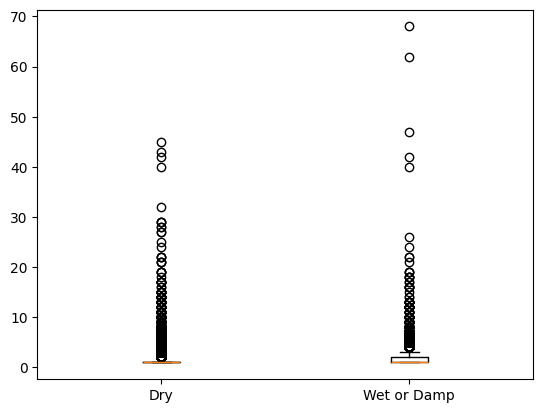

In [48]:
dry = accidents[accidents['Road_Surface_Conditions'] == 'Dry']['Number_of_Casualties']
wet = accidents[accidents['Road_Surface_Conditions'] == 'Wet or damp']['Number_of_Casualties']

f_stat, p_value = f_oneway(dry, wet)
print("P-value:", p_value)

plt.boxplot([dry, wet], labels=['Dry', 'Wet or Damp'])

<h1>INSIGHT NO. 17</h1>
<h2>Friday has the highest number of total accidents, while Sunday has the highest number of fatal accidents.</h2>

In [49]:
dayofweek_severe = accidents.groupby("DayofWeek")["Accident_Severity"].value_counts().unstack()
dayofweek_severe

Accident_Severity,Fatal,Serious,Slight
DayofWeek,,,
0,1385,11664,59631
1,1105,11918,81527
2,1113,12488,85957
3,1097,12440,85974
4,1113,12633,84154
5,1326,14000,91852
6,1522,13074,74706


In [50]:
dayofweek_severe_total = accidents.groupby("DayofWeek")["Accident_Severity"].value_counts().unstack().sum(axis=1)
dayofweek_severe_total

DayofWeek
0     72680
1     94550
2     99558
3     99511
4     97900
5    107178
6     89302
dtype: int64

<Axes: xlabel='DayofWeek'>

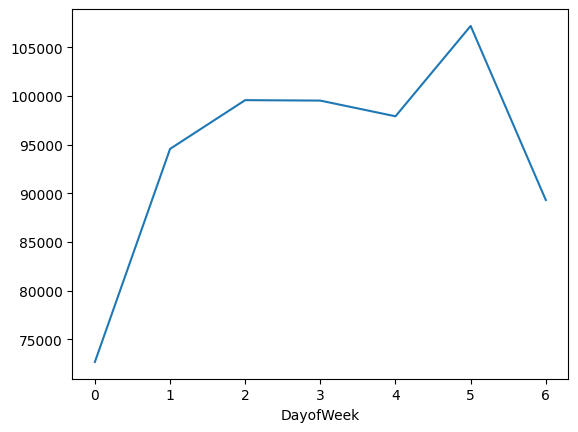

In [51]:
dayofweek_severe_total.plot(kind='line')

<h1>INSIGHT NO. 18</h1>
<h2>The total number of accidents, including fatal, serious, and slight cases, has steadily decreased from 2019 to 2022</h2>

In [52]:
year_severe = accidents.groupby(["Year", "Accident_Severity"]).size().unstack()
year_severe

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


In [53]:
year_severe_total = accidents.groupby(["Year", "Accident_Severity"]).size().unstack().sum(axis=1)
year_severe_total

Year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<Axes: xlabel='Year'>

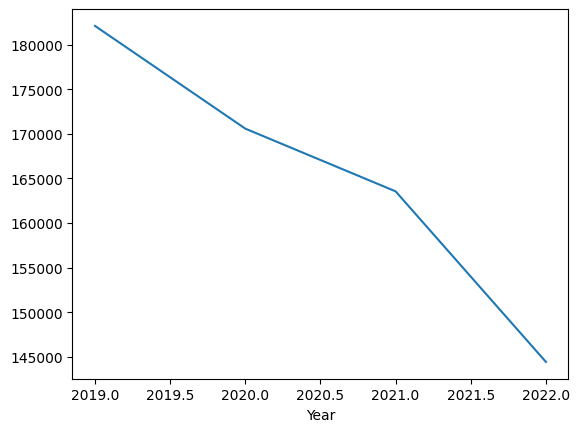

In [54]:
year_severe_total.plot(kind='line')

<h1>INSIGHT NO. 19</h1>
<h2>Accidents on wet or damp roads are significantly high in all light conditions, especially during daylight (114,119 cases) and in well-lit darkness (52,463 cases). This suggests that wet roads contribute to accidents regardless of visibility.</h2>

In [55]:
light_road = accidents.groupby(["Light_Conditions", "Road_Surface_Conditions"]).size().unstack()
light_road

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,unknown road
Light_Conditions,,,,,,
Darkness - lighting unknown,4396,15,249,105,1675,44
Darkness - lights lit,70368,160,4621,1587,52463,136
Darkness - lights unlit,1353,4,130,26,1027,3
Darkness - no lighting,15619,265,3345,757,17424,27
Daylight,356085,573,10172,3415,114119,516


In [56]:
light_road_total = accidents.groupby(["Light_Conditions", "Road_Surface_Conditions"]).size().unstack().sum(axis=1)
light_road_total


Light_Conditions
Darkness - lighting unknown      6484
Darkness - lights lit          129335
Darkness - lights unlit          2543
Darkness - no lighting          37437
Daylight                       484880
dtype: int64

<Axes: xlabel='Light_Conditions'>

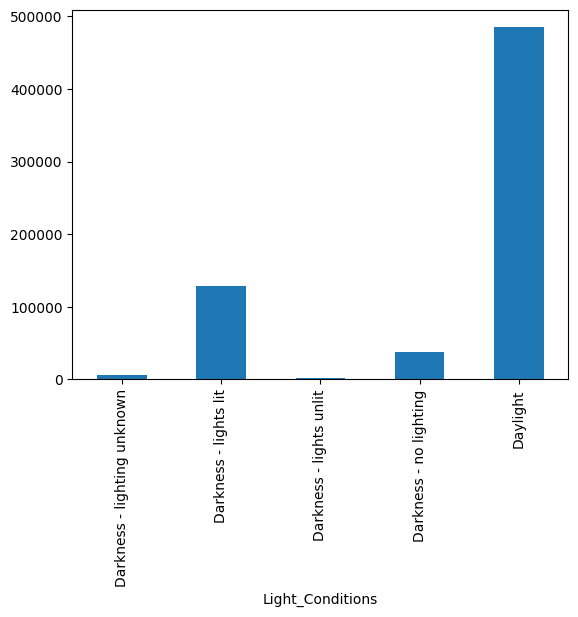

In [57]:
light_road_total.plot(kind='bar')

<h1>INSIGHT NO. 20</h1>
<h2>Snowy conditions, especially with high winds, have the lowest average (1.737), indicating that fewer vehicles are involved in accidents. This could be due to fewer cars on the road during snowstorms or drivers being more cautious.</h2>

In [58]:
weather_vehicles = accidents.groupby(["Weather_Conditions"])["Number_of_Vehicles"].mean()
weather_vehicles

Weather_Conditions
Fine + high winds        1.779401
Fine no high winds       1.836809
Fog or mist              1.807823
Other                    1.777668
Raining + high winds     1.777951
Raining no high winds    1.831610
Snowing + high winds     1.737853
Snowing no high winds    1.754889
unaccounted              1.802661
Name: Number_of_Vehicles, dtype: float64

<Axes: xlabel='Weather_Conditions'>

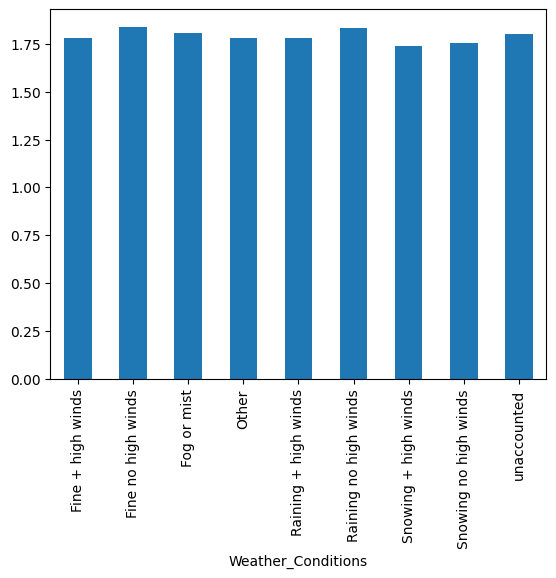

In [59]:
weather_vehicles.plot(kind='bar')